<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimalizace s využitím genetických algoritmů

Využití principů genetiky - výběr nejlepších pro umělý vývoj generací.

Wiki:
https://cs.wikipedia.org/wiki/Genetick%C3%BD_algoritmus

Youtube:
https://www.youtube.com/watch?v=uCXm6avugCo


In [0]:
import matplotlib.pyplot as plt
from random import random as rnd

## Funkce pro vytvoření jedince

In [0]:
def create():
  result = {}
  result['x'] = rnd() * 10 - 5
  result['y'] = rnd() * 10 - 5
  return result

## Funkce pro vyhodnocení jedince
Definuje kriteriální funkci. Implementované algoritmy optimalizují na maximum.

In [0]:
def evaluate(member):
  return -(member['x'] * member['x'] + member['y'] * member['y'])

## Funkce pro křížení dvou jedinců

funkce 
```python
def cross
```
je jednodušší a vždy vyžaduje, aby dítě mělo vlastnosti od obou rodičů. Funkce
```python
def cross2
```
umožňuje dědění od jediného rodiče.

In [0]:
def cross(memberA, memberB):
  result = {}
  weight = rnd()
  if (weight < 0.5):
    result['x'] = memberA['x']
    result['y'] = memberB['y']
  else: 
    result['x'] = memberB['x']
    result['y'] = memberA['y']
  return result

In [0]:
def cross2(memberA, memberB):
  result = {}
  weight = rnd()
  if (weight < 0.25):
    result['x'] = memberA['x']
    result['y'] = memberA['y']
  elif (weight < 0.5): 
    result['x'] = memberA['x']
    result['y'] = memberB['y']
  elif (weight < 0.75): 
    result['x'] = memberB['x']
    result['y'] = memberA['y']
  else:
    result['x'] = memberB['x']
    result['y'] = memberB['y']
  return result

## Mutace
Mutace je funkce, která mění jedince. Vychází z jevu, kdy dítě má některé vlastnosti odlišné od obou rodičů a to ty, které získalo díky mutaci.

In [0]:
def mutate(member):
  result = {**member}
  weight = rnd()
  randomPos = create()
  result['x'] = weight * result['x'] + (1 - weight) * randomPos['x']
  result['y'] = weight * result['y'] + (1 - weight) * randomPos['y']
  return result

## Výběr jednoho rodiče
Rodič je vybírán s pravděpodobností, která je přímo úměrná hodnotě kriteriální funkce.

$p_i=\frac{f_i}{\sum f_i}$

In [0]:
def selectParent(generation, sumValue):
  rnumber = rnd() * sumValue
  for member in generation:
    memberValue = member['value']
    if (rnumber < memberValue):
      return member
    rnumber = rnumber - memberValue
  return generation[-1]

## Vytvoření nové generace 
Nová generace je vytvořena na základě existující generace a v souladu s definovanými parametry (cross, mutation, evaluate).

In [0]:
def evaluateGeneration(generation, evaluateF):
  for member in generation:
    member['value'] = evaluateF(member)

  generation.sort(reverse=True, key = lambda member: member['value']) # setrid podle hodnoty
  return generation

def newGeneration(generation, evaluateF, crossF, mutationF, mutationProbability):
  result = []
  sumValue = 0
  for member in generation:
    sumValue = sumValue + member['value']

  for index in range(0, len(generation)):
    parentA = selectParent(generation, sumValue) #vyber rodice A
    parentB = selectParent(generation, sumValue) #vyber rodice B
    child = crossF(parentA, parentB) # krizeni

    p = rnd()
    if (p < mutationProbability):
      child = mutationF(child) # mutace
    result.append(child)
  
  evaluateGeneration(result, evaluateF)
  return result

## Zobrazení generace

In [0]:
def plotGeneration(generation, title):
  x = []
  y = []
  for member in generation:
    x.append(member['x'])
    y.append(member['y'])

  plt.plot(x, y, 'ko', ms=3)
  plt.title(title)
  plt.show()

## Simulace
Postupně jsou generovány nové generace. Výraz
```python
yield nextGeneration
```
vrací jednotlivé generace ze simulace a umožňuje jejich další zpracování.

In [0]:
def simulate(generationSize, createF, evaluateF, crossF, mutationF, mutationProbability):
  firstGeneration = []
  for index in range(0, generationSize):
    firstGeneration.append(createF())

  evaluateGeneration(firstGeneration, evaluateF)
  currentGeneration = firstGeneration
  while True:
    nextGeneration = newGeneration(currentGeneration, evaluateF, crossF, mutationF, mutationProbability)
    yield nextGeneration
    currentGeneration = nextGeneration

  pass


### Využití simulace

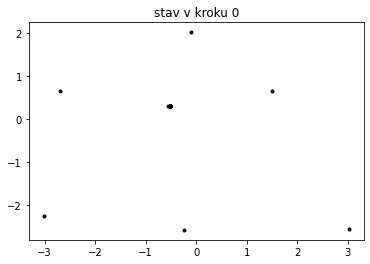

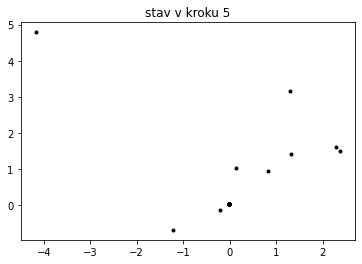

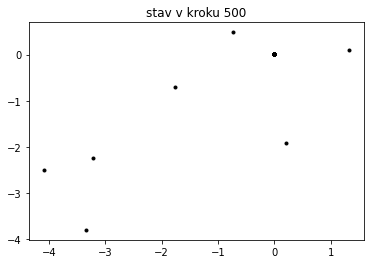

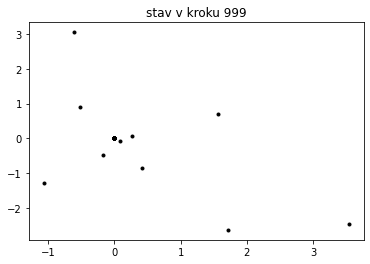

Solution:  {'x': -0.00014758314508862293, 'y': -0.0004102500416186378, 'value': -1.9008588136234359e-07}


In [107]:
steps = 1000
keys = [0, 5, steps // 2, steps - 1]

createF = create
evaluateF = evaluate
crossF = cross
mutationF = mutate
mutationProbability = 0.1
generationSize = 100
solver = simulate(generationSize, createF, evaluateF, crossF, mutationF, mutationProbability)
for i in range(0, steps):
  currentGeneration = next(solver)
  if (i in keys):
    plotGeneration(currentGeneration, 'stav v kroku ' + str(i))
print('Solution: ', str(currentGeneration[0]))